# Project 1

Project 1 is **Classification Analysis on Textual Data**, where you extract features from raw texts and try different classification approaches to classify them into topics.

During this discussion, we introduce some key concepts and usages of relevant Python packages to help you get started with your project.

This explanation are mainly from different sections of the scikit-learn tutorial on text classification available at http://scikit-learn.org.

## Installation & Environment Setup

### Anaconda

Anaconda is recommended as a popular Python distribution with package & environment managing tools, which provides most of the tools we would use during the course. It supports Windows, macOS and Linux.

Anaconda can be downloaded from https://www.anaconda.com/download/. You can follow their official installation instructions at https://docs.anaconda.com/anaconda/install/ to easily install it.

If you are new to Python, Python 3.6.\* is recommended; if you prefer Python 2, it is also fine.

### Jupyter

>The Jupyter Notebook App is a server-client application that allows editing and running notebook documents via a web browser. The Jupyter Notebook App can be executed on a local desktop requiring no internet access (as described in this document) or can be installed on a remote server and accessed through the internet. <span style="margin-top: 1em; float: right;">--from <a href="http://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html">Jupyter/IPython Notebook Quick Start Guide</a></span>

Jupyter comes with Anaconda by default, so you can simply start it using the following command at the Terminal (Mac/Linux) or Command Prompt (Windows):
```
jupyter notebook
```

See https://jupyter.readthedocs.io/en/latest/running.html#running for more details.

#### Demo of plotting in Jupyter notebook (`matplotlib`)

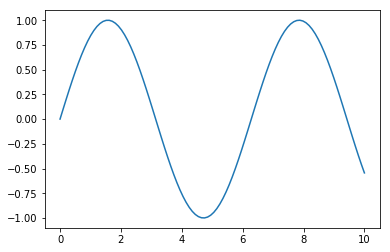

In [90]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y)

## Online Python Tutorials

If you are looking to learn python from scratch or you may need to refresh your python skills, we recommend to check out this interactive python tutorial: https://www.learnpython.org

Another machine learning oriented tutorial is at
https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
(thanks to the recommendation from Eric Schultz)

## Loading the 20 Newsgroups Dataset

1. In **Project 1** we work with “20 Newsgroups” dataset. It is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. It is is splitted in two subsets: one for training (or development) and the other one for testing (or for performance evaluation) and is a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.
2. The easiest way to load the data is to use the built-in dataset loader for "20 newsgroups" from scikit-learn package.

In [5]:
from sklearn.datasets import fetch_20newsgroups
# Refer to the offcial document of scikit-learn for detailed usages:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
categories = ['comp.graphics', 'comp.sys.mac.hardware']
# The 
twenty_train = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  categories=categories, # choose the categories to load; if is `None`, load all categories
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [6]:
print(type(twenty_train))
print(twenty_train.keys())

<class 'sklearn.datasets.base.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])


In [7]:
twenty_train.filenames # the path to the text files storing the documents

array([ '/Users/nnguyen/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/50423',
       '/Users/nnguyen/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38237',
       '/Users/nnguyen/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38277',
       ...,
       '/Users/nnguyen/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38592',
       '/Users/nnguyen/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.mac.hardware/51688',
       '/Users/nnguyen/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38739'], 
      dtype='<U95')

In [8]:
len(twenty_train.filenames) # 1162 documents in the train subset

1162

In [9]:
len(twenty_train.data) # `twenty_train.data` or `twenty_train['data']` is the list storing document strings

1162

In [10]:
print(twenty_train.data[0]) # the content of the first document is printed below

From: winstead@faraday.ece.cmu.edu (Charles Holden Winstead)
Subject: ftp site for Radius software???
Organization: Electrical and Computer Engineering, Carnegie Mellon

Hey All,

Does anyone know if I can ftp to get the newest version of Radiusware
and soft pivot from Radius?  I bought a pivot monitor, but it has an
old version of this software and won't work on my C650, and Radius said
it would be 4-5 weeks until delivery.

Thanks!

-Chuck





In [11]:
print(twenty_train.target_names[0]) # the content of the first document is printed below

comp.graphics


In [12]:
# list of category indices of the documents
twenty_train.target # twenty_train['target']

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
len(twenty_train.target) # 

1162

In [14]:
# `twenty_train.target` only contains 0 and 1
import numpy as np
np.unique(twenty_train.target)

array([0, 1])

In [15]:
# index 0 corresponds to 'comp.graphics'; 1 to 'comp.sys.mac.hardware'
print(twenty_train.target_names) # twenty_train['target_names']

['comp.graphics', 'comp.sys.mac.hardware']


In [16]:
# The first document belongs to the category 'comp.sys.mac.hardware'
print(twenty_train.target_names[twenty_train.target[0]])

comp.sys.mac.hardware


The files themselves are loaded in memory in the data attribute.

In [17]:
print(len(twenty_train.data))
print(len(twenty_train.target))
print(len(twenty_train.target_names))

1162
1162
2


## Extracting features from text files

### Bag of Words

Bag of words is one of the simplest and most common representation of texts, where each document is represented by an unordered list (or a so-called "bag") of words.

### Document-term Matrix

$\begin{pmatrix}tf(d_1, t_1) & \cdots & tf(d_1, t_m) \\ tf(d_2, t_1) & \cdots & tf(d_2, t_m) \\ \vdots & \vdots & \vdots \\ tf(d_n, t_1) & \cdots & tf(d_n, t_m) \end{pmatrix}$

$tf(d, t)$: term frequency of term $t$ in the document $d$, i.e. the number of occurrances of term $t$ in the document $d$.

The class `CountVectorizer` can help us to convert a collection of text documents to a document-term matrix.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

#### `min_df`, `max_df` and stopwords

In [19]:
min_dfs = range(1,5)
for min_df in min_dfs:
    count_vect_tmp = CountVectorizer(min_df=min_df)
    X_train_tmp = count_vect_tmp.fit_transform(twenty_train.data)
    print(X_train_tmp.shape)

(1162, 19610)
(1162, 9420)
(1162, 6348)
(1162, 4867)


**Stopwords**: Words that are too common to be useful in classification

In [20]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
print(stop_words)
print(len(stop_words))

frozenset({'nobody', 'every', 'eg', 'even', 'now', 'otherwise', 'whether', 'upon', 'my', 'whereupon', 'with', 'out', 'made', 'whither', 'de', 'again', 'could', 'along', 'elsewhere', 'four', 'myself', 'never', 'off', 'no', 'although', 'seem', 'else', 'been', 'fire', 'are', 'hereby', 'to', 'which', 'down', 'another', 'whereafter', 'whereby', 'there', 'however', 'put', 'still', 'amount', 'becomes', 'itself', 'herself', 'beforehand', 'sometime', 'hers', 'beside', 'eleven', 'because', 'sixty', 'towards', 'became', 'within', 'full', 'cant', 'noone', 'least', 'as', 'but', 'side', 'fill', 'if', 'an', 'either', 'twelve', 'give', 'hundred', 'cry', 'formerly', 'she', 'since', 'get', 'their', 'below', 'from', 'for', 'rather', 'each', 'wherever', 'bill', 'move', 'nothing', 'onto', 'ours', 'they', 'one', 'during', 'serious', 'whoever', 'being', 'why', 'indeed', 'go', 'same', 'who', 'yourself', 'into', 'ltd', 'sometimes', 'anyhow', 'themselves', 'after', 'thin', 'what', 'be', 'due', 'somehow', 'pleas

For the detailed documentation of `CountVectorizer`, see

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Note: `fit`, `fit_transform`, `transform` are common methods of all kinds of data transformers in `scikit learn`

#### Demo

In [21]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]

# `fit_transform(corpus)` is equivalent to `fit(corpus)` then `transform(corpus)`
X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [22]:
# use `toarray()` to convert sparse matrices to ordinary matrices (multi-dim arrays)
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [23]:
X.toarray().shape

(4, 9)

In [24]:
# feature names are terms
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [30]:
test_corpus = [
    'Another random document.'
]

# Use `transform` instead of `fit_transform` here, to only count
# terms that are in the vocabulary of the training dataset
Y = vectorizer.transform(test_corpus)
# Here 'Another' and 'random' are just ignored
Y.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [31]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [32]:
# count_vect = CountVectorizer(min_df=3)
count_vect = CountVectorizer(min_df=3, stop_words='english')
# count_vect = CountVectorizer(stop_words='english', min_df=3, max_df=0.7)
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape # 1162 docs, 19610 terms in the training dataset

(1162, 6078)

In [33]:
X_test_counts = count_vect.transform(twenty_test.data)
X_test_counts.shape # 774 docs, 19610 terms in the training dataset

(774, 6078)

In [35]:
count_vect.get_feature_names()

['00',
 '000',
 '0010580b',
 '01',
 '02',
 '020',
 '0200',
 '03',
 '030',
 '04',
 '040',
 '05',
 '06',
 '060493101758',
 '0608',
 '07',
 '08',
 '09',
 '0953',
 '0x100',
 '10',
 '100',
 '1000',
 '101',
 '1010',
 '101010',
 '101e',
 '102',
 '102007',
 '1024',
 '1024x768',
 '105',
 '106',
 '109',
 '11',
 '110',
 '1100',
 '1101',
 '11230',
 '113',
 '114158',
 '115',
 '115a',
 '11632',
 '11670',
 '1170',
 '12',
 '120',
 '12091',
 '123',
 '1246',
 '127',
 '128',
 '1280',
 '129',
 '13',
 '130',
 '1304',
 '1304s',
 '131',
 '131239',
 '132',
 '1320',
 '132mb',
 '133',
 '134',
 '13495',
 '135',
 '136',
 '137',
 '138',
 '139',
 '13h',
 '14',
 '140',
 '1400',
 '141',
 '142',
 '1430',
 '144',
 '144750',
 '144843',
 '146',
 '147',
 '149',
 '15',
 '150',
 '151',
 '152',
 '152944br4416a',
 '153',
 '15490',
 '155',
 '1568',
 '157',
 '15th',
 '16',
 '160',
 '160x2xx',
 '163',
 '164940',
 '1653',
 '167',
 '16bit',
 '16mb',
 '16mhz',
 '17',
 '170',
 '171',
 '172',
 '175',
 '178',
 '18',
 '180',
 '181440',

The feature names list returned by `get_feature_names()` can be used as the mapping from column index to feature name ;

The converse mapping from feature name to column index is stored in the `vocabulary_` attribute of the vectorizer:

In [113]:
len(count_vect.get_feature_names())

6078

In [114]:
print(count_vect.get_feature_names()[1000:1020])
print('-' * 20)
print(count_vect.vocabulary_.get('circuitry'))
print(count_vect.get_feature_names()[1313])

['blue', 'blvd', 'bm967', 'bmp', 'bmug', 'bnr', 'board', 'boards', 'boat', 'bob', 'bobc', 'body', 'boeing', 'boesel', 'boisvert', 'boivert', 'bolero', 'bolson', 'bonar', 'boned']
--------------------
1313
circuitry


### TF-IDF

TF-IDF score is used to describe "how important a word is to a document in a collection or corpus" (from [Wikipedia - tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))

$$TF\times IDF(d,t)=tf(d,t)\times idf(t)$$
<hr>
$$idf(t)=\log(\frac{n}{df(t)})+1$$

- $tf(t, d)$: term frequency of term $t$ in the document $d$.


- $idf(t)$: inverse document frequency of term $t$ across the document dataset.
  - $df(t)$: # of documents that contain the term $t$.
  - Intuition: words that appear in all documents are useless in classificaiton.
  
The formula that is used to compute the tf-idf of term t is tf-idf(d, t) = tf(t) * idf(d, t), and the idf is computed as idf(d, t) = log [ n / df(d, t) ] + 1 (if smooth_idf=False), where n is the total number of documents and df(d, t) is the document frequency; the document frequency is the number of documents d that contain term t. The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored. (Note that the idf formula above differs from the standard textbook notation that defines the idf as idf(d, t) = log [ n / (df(d, t) + 1) ]).

If smooth_idf=True (the default), the constant “1” is added to the numerator and denominator of the idf as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions: idf(d, t) = log [ (1 + n) / (1 + df(d, t)) ] + 1.

In [115]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# recall that X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)
print('-' * 20)
print(X_train_counts.toarray()[:30,:5])
print('-' * 20)
print(X_train_tfidf.toarray()[:30,:5])

(1162, 6078)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 2]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.08238187]
 [0.         0.         0.      

## Training a classifier

Let's train a classifier to predict the category of a post.

In [116]:
# We use Naive Bayes classifier as an example
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [117]:
docs_new = ['He is an OS developer', 'OpenGL on the GPU is fast']
# ['comp.graphics', 'comp.sys.mac.hardware']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'He is an OS developer' => comp.sys.mac.hardware
'OpenGL on the GPU is fast' => comp.graphics


In [118]:
predicted

array([1, 0])

In [128]:
from sklearn.svm import LinearSVC
LinearSVC().fit(X_train_tfidf, twenty_train.target).predict(X_new_tfidf)

array([1, 0])

## Dimensionality reduction

### NMF: Non-negative matrix factorization
\begin{array}{cc}
\min_\limits{\mathbf{W}, \mathbf{H}} & \lVert\mathbf{X} - \mathbf{W}\mathbf{H}\rVert_F^2 \\
s.t. & \mathbf{W} \ge 0 \\
& \mathbf{H} \ge 0
\end{array}

$\mathbf{X} \in \mathbb{R}^{m\times n}$,

$\mathbf{W} \in \mathbb{R}^{m\times k}$, $\mathbf{H} \in \mathbb{R}^{k\times n}$, $k < \mathrm{rank}(\mathbf{X})$

In [131]:
from sklearn.decomposition import NMF

model = NMF(n_components=50, init='random', random_state=0)
W_train = model.fit_transform(X_train_tfidf)

print(W_train.shape)

(1162, 50)


In [125]:
H = model.components_
H.shape

(100, 6078)

In [132]:
W_test = model.transform(X_new_tfidf)

clf = MultinomialNB().fit(W_train, twenty_train.target)

predicted = clf.predict(W_test)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'He is an OS developer' => comp.graphics
'OpenGL on the GPU is fast' => comp.graphics


In [136]:
from sklearn.svm import LinearSVC
LinearSVC(loss='hinge',C=0.01).fit(W_train, twenty_train.target).predict(W_test)

array([0, 0])

### LSA/LSI

https://simonpaarlberg.com/post/latent-semantic-analyses/

In [138]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
X_train_reduced = svd.fit_transform(X_train_tfidf)
print(X_train_reduced.shape)

(1162, 50)


In [143]:
X_new_reduced = model.transform(X_new_tfidf)

clf = LinearSVC().fit(X_train_reduced, twenty_train.target)

predicted = clf.predict(X_new_reduced)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'He is an OS developer' => comp.graphics
'OpenGL on the GPU is fast' => comp.graphics


## Feature Engineering: Stemming & Lemmatization

### NLTK
1. Download NLTK package
  1. `conda install -c anaconda nltk` <br>or
  2. `pip install nltk`
2. Have the stopwords corpus on your computer
  1. `nltk.download()` if you want to download any data in NLTK
  2. instruction for downloading can be found http://www.nltk.org/data.html
3. More detailed information can be found 
  1. http://www.nltk.org/api/nltk.stem.html#module-nltk.stem
  2. https://www.kaggle.com/alvations/basic-nlp-with-nltk

### Use custom stop words

In [42]:
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
# nltk.download('stopwords' )
stop_words_en = stopwords.words('english')

print("# of stop_words_skt:\t\t %s" % len(stop_words_skt))
print("# of stop_words_en:\t\t %s" % len(stop_words_en))
from string import punctuation
print("# of punctuation:\t\t %s" % len(punctuation))
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
print("# of combined_stopwords:\t %s" % len(combined_stopwords))

# of stop_words_skt:		 318
# of stop_words_en:		 179
# of punctuation:		 32
# of combined_stopwords:	 410


### Stemming and Lemmatization
Often we want to map the different forms of the same word to the same root word, e.g. "walks", "walking", "walked" should all be the same as "walk".

The stemming and lemmatization process are hand-written regex rules written find the root word.

1. Stemming: Trying to shorten a word with simple regex rules

2. Lemmatization: Trying to find the root word with linguistics rules (with the use of regexes)

#### Stemming

In [43]:
# popular stemmers
import nltk
ps = nltk.stem.PorterStemmer()
test_list = ['grows','does','leaves','fairly','article']
print("-"*20 + " PorterStemmer " + "-"*20)
for item in test_list:
    print(ps.stem(item))
print("-"*20 + " SnowballStemmer " + "-"*20)
sno = nltk.stem.SnowballStemmer('english')
for item in test_list:
    print(sno.stem(item))

-------------------- PorterStemmer --------------------
grow
doe
leav
fairli
articl
-------------------- SnowballStemmer --------------------
grow
doe
leav
fair
articl


#### Lemmatizer
1. Lemmatize using WordNet’s built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet. The default pos=NOUN.
2. The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags
3. 'pos_tag' takes the tokenized sentence as input, i.e. list of string,and returns a tuple of (word, tg), i.e. list of tuples of strings
  1. pos_tag uses  Penn Treebank http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
  2. We can just map some of them to wordnet
  3. In the wordnet (ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v', POS_LIST = [NOUN, VERB, ADJ, ADV])
     You can find detailed information here http://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html


In [46]:
import nltk
# nltk.download()#, if you need "corpora/wordnet", choose it
wnl = nltk.wordnet.WordNetLemmatizer()
#lemmatize(word, pos='n')
print("-"*20 + " WordNetLemmatizer " + "-"*20)
for item in test_list:
    print(wnl.lemmatize(item))
print("-"*20 + " Another example for WordNetLemmatizer " + "-"*20)
for word in ['walking', 'walks', 'walked']:
    print(wnl.lemmatize(word))
print(wnl)

-------------------- WordNetLemmatizer --------------------
grows
doe
leaf
fairly
article
-------------------- Another example for WordNetLemmatizer --------------------
walking
walk
walked
<WordNetLemmatizer>


In [50]:
# one example for advanced stemming
# The lemmatizer is actually pretty complicated, it needs Parts of Speech (POS) tags
from nltk import pos_tag
# nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()
walking_tagged = pos_tag(nltk.word_tokenize('He is walking to school'))
print(walking_tagged)
print("mapping to Verb, Noun, Adjective, Adverbial")

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
def lemmatize_sent_demo(text): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]
lemmatize_sent_demo('He is walking to school')

[('He', 'PRP'), ('is', 'VBZ'), ('walking', 'VBG'), ('to', 'TO'), ('school', 'NN')]
mapping to Verb, Noun, Adjective, Adverbial


['he', 'be', 'walk', 'to', 'school']

In [51]:
# tokenize -> stem -> remove punctuation & stop words
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump

from sklearn.datasets import fetch_20newsgroups
comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
twenty_test = fetch_20newsgroups(subset='test', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
counts = []

In [52]:
len(twenty_train.data)

4732

CountVectorizer().build_analyzer()  """Return a callable that handles preprocessing and tokenization"""
https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/feature_extraction/text.py#L247


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
analyzer = TfidfVectorizer(stop_words=combined_stopwords, preprocessor=lambda doc: doc.translate(str.maketrans(dict.fromkeys('0123456789')))).build_analyzer()

In [56]:
# overwrite analyzer with callable function:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
min_dfs = range(1,5)
for min_df in min_dfs:
    count_vect1 = CountVectorizer(min_df=min_df,analyzer=stem_rmv_punc)
    X_train_counts1 = count_vect1.fit_transform(twenty_train.data)
    print(X_train_counts1.shape)

(4732, 69068)
(4732, 24849)
(4732, 16292)
(4732, 12640)


In [ ]:
count_vect1

## Evaluation of a Classifier

In [ ]:
%%html
<style>
// add your CSS styling here
</style>
<style>
.visualhide {
    position: absolute;
    left: -10000px;
    top: auto;
    width: 1px;
    height: 1px;
    overflow: hidden;
}
table.wikitable {
    background-color: #f8f9fa;
    color: #222;
    margin: 1em 0;
    border: 1px solid #a2a9b1;
    border-collapse: collapse;
}
.rendered_html td {
    text-align: center;
}
.rendered_html tbody tr:nth-child(odd) {
    background: transparent;
}
</style>

### Confusion Matrix

See [Wikipedia - Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

Each **row** of the matrix represents the instances in a **predicted class**<br> while each **column** represents the instances in an **actual class** (or vice versa).

Many statistics can be derived from the **Confusion Matrix**.

Below is an example for binary classification, where by convention we call one class as **Positive** and another as **Negative**.
<table class="wikitable" align="center" style="text-align:center; border:none; background:transparent;">
<tbody><tr>
<td style="border:none;" colspan="2"></td>
<td style="background:#eeeebb;" colspan="2"><b>True condition</b></td>
</tr>
<tr>
<td style="border:none;"></td>
<td style="background:#dddddd;"><a href="https://en.wikipedia.org/wiki/Statistical_population" title="Statistical population">Total population</a></td>
<td style="background:#ffffcc;">Condition positive</td>
<td style="background:#ddddaa;">Condition negative</td>
<td style="background:#eeeecc;font-size:90%;"><a href="https://en.wikipedia.org/wiki/Prevalence" title="Prevalence">Prevalence</a> <span style="font-size:118%;white-space:nowrap;">= <span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ&nbsp;Condition positive</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Total population</span></span></span></td>
<td style="background:#cceecc;border-left:double silver;font-size:90%;" colspan="2"><a href="https://en.wikipedia.org/wiki/Accuracy_and_precision" title="Accuracy and precision">Accuracy</a> (ACC) = <span style="font-size:118%;"><span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ&nbsp;True positive + Σ True negative</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Total population</span></span></span></td>
</tr>
<tr>
<td style="background:#bbeeee;" rowspan="2"><b>Predicted<br>
condition</b></td>
<td style="background:#ccffff;">Predicted condition<br>
positive</td>
<td style="background:#ccffcc;"><span style="color:#006600;"><b><a href="https://en.wikipedia.org/wiki/True_positive" class="mw-redirect" title="True positive">True positive</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Statistical_power" title="Statistical power">Power</a></span></td>
<td style="background:#eedddd;"><span style="color:#cc0000;"><b><a href="https://en.wikipedia.org/wiki/False_positive" class="mw-redirect" title="False positive">False positive</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Type_I_error" class="mw-redirect" title="Type I error">Type I error</a></span></td>
<td style="background:#ccffee;border-top:double silver;font-size:90%;"><a href="https://en.wikipedia.org/wiki/Positive_predictive_value" class="mw-redirect" title="Positive predictive value">Positive predictive value</a> (PPV), <a href="https://en.wikipedia.org/wiki/Precision_(information_retrieval)" class="mw-redirect" title="Precision (information retrieval)">Precision</a> = <span style="font-size:118%;white-space:nowrap;"><span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ True positive</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Predicted&nbsp;condition&nbsp;positive</span></span></span></td>
<td style="background:#cceeff;border-top:double silver;font-size:90%;" colspan="2"><a href="https://en.wikipedia.org/wiki/False_discovery_rate" title="False discovery rate">False discovery rate</a> (FDR) = <span style="font-size:118%;white-space:nowrap;"><span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ False positive</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Predicted&nbsp;condition&nbsp;positive</span></span></span></td>
</tr>
<tr>
<td style="background:#aadddd;">Predicted condition<br>
negative</td>
<td style="background:#ffdddd;"><span style="color:#cc0000;"><b><a href="https://en.wikipedia.org/wiki/False_negative" class="mw-redirect" title="False negative">False negative</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Type_II_error" class="mw-redirect" title="Type II error">Type II error</a></span></td>
<td style="background:#bbeebb;"><span style="color:#006600;"><b><a href="https://en.wikipedia.org/wiki/True_negative" class="mw-redirect" title="True negative">True negative</a></b></span></td>
<td style="background:#eeddee;border-bottom:double silver;font-size:90%;"><a href="https://en.wikipedia.org/wiki/False_omission_rate" class="mw-redirect" title="False omission rate">False omission rate</a> (FOR) = <span style="font-size:118%;white-space:nowrap;"><span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ False negative</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Predicted&nbsp;condition&nbsp;negative</span></span></span></td>
<td style="background:#aaddcc;border-bottom:double silver;font-size:90%;" colspan="2"><a href="https://en.wikipedia.org/wiki/Negative_predictive_value" class="mw-redirect" title="Negative predictive value">Negative predictive value</a> (NPV) = <span style="font-size:118%;white-space:nowrap;"><span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ True negative</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Predicted&nbsp;condition&nbsp;negative</span></span></span></td>
</tr>
<tr style="font-size:90%;">
<td style="border:none;vertical-align:bottom;padding:0 2px 0 0;color:#999999;" colspan="2" rowspan="2"></td>
<td style="background:#eeffcc;"><a href="https://en.wikipedia.org/wiki/True_positive_rate" class="mw-redirect" title="True positive rate">True positive rate</a> (TPR), <a href="https://en.wikipedia.org/wiki/Recall_(information_retrieval)" class="mw-redirect" title="Recall (information retrieval)">Recall</a>, <a href="https://en.wikipedia.org/wiki/Sensitivity_(tests)" class="mw-redirect" title="Sensitivity (tests)">Sensitivity</a>, probability&nbsp;of&nbsp;detection <span style="font-size:118%;white-space:nowrap;">= <span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ True positive</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Condition&nbsp;positive</span></span></span></td>
<td style="background:#eeddbb;"><a href="https://en.wikipedia.org/wiki/False_positive_rate" title="False positive rate">False positive rate</a> (FPR), <a href="https://en.wikipedia.org/wiki/Information_retrieval" title="Information retrieval"><span class="nowrap">Fall-out</span></a>, probability&nbsp;of&nbsp;false&nbsp;alarm <span style="font-size:118%;white-space:nowrap;">= <span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ False positive</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Condition&nbsp;negative</span></span></span></td>
<td style="background:#eeeeee;"><a href="https://en.wikipedia.org/wiki/Positive_likelihood_ratio" class="mw-redirect" title="Positive likelihood ratio">Positive likelihood ratio</a> <span class="nowrap">(LR+)</span> <span style="font-size:118%;white-space:nowrap;">= <span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">TPR</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">FPR</span></span></span></td>
<td style="background:#dddddd;" rowspan="2"><a href="https://en.wikipedia.org/wiki/Diagnostic_odds_ratio" title="Diagnostic odds ratio">Diagnostic odds ratio</a> (DOR) <span style="font-size:118%;white-space:nowrap;">= <span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">LR+</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">LR−</span></span></span></td>
<td style="background:#ddffdd;border-left:double silver;line-height:2;" rowspan="2"><a href="https://en.wikipedia.org/wiki/F1_score" title="F1 score">F<sub>1</sub> score</a> = <span style="font-size:118%;white-space:nowrap;"><span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">2</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;"><span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">1</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Recall</span></span>&nbsp;+&nbsp;<span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">1</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Precision</span></span></span></span></span></td>
</tr>
<tr style="font-size:90%;">
<td style="background:#ffeecc;"><a href="https://en.wikipedia.org/wiki/False_negative_rate" class="mw-redirect" title="False negative rate">False negative rate</a> (FNR), Miss&nbsp;rate <span style="font-size:118%;white-space:nowrap;">= <span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ False negative</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Condition&nbsp;positive</span></span></span></td>
<td style="background:#ddeebb;"><a href="https://en.wikipedia.org/wiki/True_negative_rate" class="mw-redirect" title="True negative rate">True negative rate</a> (TNR), <a href="https://en.wikipedia.org/wiki/Specificity_(tests)" class="mw-redirect" title="Specificity (tests)">Specificity</a> (SPC) <span style="font-size:118%;white-space:nowrap;">= <span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">Σ True negative</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">Σ&nbsp;Condition&nbsp;negative</span></span></span></td>
<td style="background:#cccccc;"><a href="https://en.wikipedia.org/wiki/Negative_likelihood_ratio" class="mw-redirect" title="Negative likelihood ratio">Negative likelihood ratio</a> <span class="nowrap">(LR−)</span> <span style="font-size:118%;white-space:nowrap;">= <span class="sfrac nowrap" style="display:inline-block; vertical-align:-0.5em; font-size:85%; text-align:center;"><span style="display:block; line-height:1em; margin:0 0.1em;">FNR</span><span class="visualhide">/</span><span style="display:block; line-height:1em; margin:0 0.1em; border-top:1px solid;">TNR</span></span></span></td>
</tr>
</tbody></table>

### Precision and recall
<table class="wikitable" align="center" style="text-align: center ; border: none ; background: transparent">
<tbody><tr>
<td style="border: none" colspan="2"></td>
<td style="background: #eeeebb" colspan="2"><b>True condition</b></td>
</tr>
<tr>
<td style="border: none"></td>
<td style="background: #dddddd"><a href="https://en.wikipedia.org/wiki/Statistical_population" title="Statistical population" target="_blank">Total population</a></td>
<td style="background: #ffffcc">Condition positive</td>
<td style="background: #ddddaa">Condition negative</td>
<td style="background: #eee ; font-size: 90%"><a href="https://en.wikipedia.org/wiki/Prevalence" title="Prevalence" target="_blank">Prevalence</a> <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ&nbsp;Condition positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Total population</span></span></span></td>
<td style="background: #eee ; border-left: double silver ; font-size: 90%" colspan="2"><a href="https://en.wikipedia.org/wiki/Accuracy_and_precision" title="Accuracy and precision" target="_blank">Accuracy</a> (ACC) = <span style="font-size: 118%"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ&nbsp;True positive + Σ True negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Total population</span></span></span></td>
</tr>
<tr>
<td style="background: #bbeeee" rowspan="2"><b>Predicted<br>
condition</b></td>
<td style="background: #ccffff">Predicted condition<br>
positive</td>
<td style="background: #ccffcc"><span style="color: #006600"><b><a href="https://en.wikipedia.org/wiki/True_positive" class="mw-redirect" title="True positive" target="_blank">True positive</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Statistical_power" title="Statistical power" target="_blank">Power</a></span></td>
<td style="background: #eedddd"><span style="color: #cc0000"><b><a href="https://en.wikipedia.org/wiki/False_positive" class="mw-redirect" title="False positive" target="_blank">False positive</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Type_I_error" class="mw-redirect" title="Type I error" target="_blank">Type I error</a></span></td>
<td style="background: #ccffee;border-top: double silver;font-size: 90%;font-weight: bold;"><a href="https://en.wikipedia.org/wiki/Positive_predictive_value" class="mw-redirect" title="Positive predictive value" target="_blank">Positive predictive value</a> (PPV), <a href="https://en.wikipedia.org/wiki/Precision_(information_retrieval)" class="mw-redirect" title="Precision (information retrieval)" target="_blank">Precision</a> = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ True positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Predicted&nbsp;condition&nbsp;positive</span></span></span></td>
<td style="background: #eee ; border-top: double silver ; font-size: 90%" colspan="2"><a href="https://en.wikipedia.org/wiki/False_discovery_rate" title="False discovery rate" target="_blank">False discovery rate</a> (FDR) = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ False positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Predicted&nbsp;condition&nbsp;positive</span></span></span></td>
</tr>
<tr>
<td style="background: #aadddd">Predicted condition<br>
negative</td>
<td style="background: #ffdddd"><span style="color: #cc0000"><b><a href="https://en.wikipedia.org/wiki/False_negative" class="mw-redirect" title="False negative" target="_blank">False negative</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Type_II_error" class="mw-redirect" title="Type II error" target="_blank">Type II error</a></span></td>
<td style="background: #bbeebb"><span style="color: #006600"><b><a href="https://en.wikipedia.org/wiki/True_negative" class="mw-redirect" title="True negative" target="_blank">True negative</a></b></span></td>
<td style="background: #eee ; border-bottom: double silver ; font-size: 90%"><a href="https://en.wikipedia.org/wiki/False_omission_rate" class="mw-redirect" title="False omission rate" target="_blank">False omission rate</a> (FOR) = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ False negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Predicted&nbsp;condition&nbsp;negative</span></span></span></td>
<td style="background: #eee ; border-bottom: double silver ; font-size: 90%" colspan="2"><a href="https://en.wikipedia.org/wiki/Negative_predictive_value" class="mw-redirect" title="Negative predictive value" target="_blank">Negative predictive value</a> (NPV) = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ True negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Predicted&nbsp;condition&nbsp;negative</span></span></span></td>
</tr>
<tr style="font-size: 90%">
<td style="border: none ; vertical-align: bottom ; padding: 0 2px 0 0 ; color: #999999" colspan="2" rowspan="2"></td>
<td style="background: #eeffcc;font-weight: bold;"><a href="https://en.wikipedia.org/wiki/True_positive_rate" class="mw-redirect" title="True positive rate" target="_blank">True positive rate</a> (TPR), <a href="https://en.wikipedia.org/wiki/Recall_(information_retrieval)" class="mw-redirect" title="Recall (information retrieval)" target="_blank">Recall</a>, <a href="https://en.wikipedia.org/wiki/Sensitivity_(tests)" class="mw-redirect" title="Sensitivity (tests)" target="_blank">Sensitivity</a>, probability&nbsp;of&nbsp;detection <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ True positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Condition&nbsp;positive</span></span></span></td>
<td style="background: #eee"><a href="https://en.wikipedia.org/wiki/False_positive_rate" title="False positive rate" target="_blank">False positive rate</a> (FPR), <a href="https://en.wikipedia.org/wiki/Information_retrieval" title="Information retrieval" target="_blank"><span class="nowrap">Fall-out</span></a>, probability&nbsp;of&nbsp;false&nbsp;alarm <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ False positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Condition&nbsp;negative</span></span></span></td>
<td style="background: #eeeeee"><a href="https://en.wikipedia.org/wiki/Positive_likelihood_ratio" class="mw-redirect" title="Positive likelihood ratio" target="_blank">Positive likelihood ratio</a> <span class="nowrap">(LR+)</span> <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">TPR</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">FPR</span></span></span></td>
<td style="background: #eee" rowspan="2"><a href="https://en.wikipedia.org/wiki/Diagnostic_odds_ratio" title="Diagnostic odds ratio" target="_blank">Diagnostic odds ratio</a> (DOR) <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">LR+</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">LR−</span></span></span></td>
<td style="background: #ddffdd;border-left: double silver;line-height: 2;font-weight: bold;" rowspan="2"><a href="https://en.wikipedia.org/wiki/F1_score" title="F1 score" target="_blank">F<sub>1</sub> score</a> = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">2</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">1</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Recall</span></span>&nbsp;+&nbsp;<span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">1</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Precision</span></span></span></span></span></td>
</tr>
<tr style="font-size: 90%">
<td style="background: #eee"><a href="https://en.wikipedia.org/wiki/False_negative_rate" class="mw-redirect" title="False negative rate" target="_blank">False negative rate</a> (FNR), Miss&nbsp;rate <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ False negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Condition&nbsp;positive</span></span></span></td>
<td style="background: #eee"><a href="https://en.wikipedia.org/wiki/True_negative_rate" class="mw-redirect" title="True negative rate" target="_blank">True negative rate</a> (TNR), <a href="https://en.wikipedia.org/wiki/Specificity_(tests)" class="mw-redirect" title="Specificity (tests)" target="_blank">Specificity</a> (SPC) <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ True negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Condition&nbsp;negative</span></span></span></td>
<td style="background: #eee"><a href="https://en.wikipedia.org/wiki/Negative_likelihood_ratio" class="mw-redirect" title="Negative likelihood ratio" target="_blank">Negative likelihood ratio</a> <span class="nowrap">(LR−)</span> <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">FNR</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">TNR</span></span></span></td>
</tr>
</tbody></table>

- Looking at only one of them is not enough: e.g. a classifier classifying nearly everything to negative can have a high **precision**, but then its **recall** is low, and *vice versa*
- Thus, $F_1$ score is designed to kind of combine the precision and recall together using harmonic average and gives out a comprehensive measure of the classification quality.

### Receiver operating characteristic (ROC)
<table class="wikitable" align="center" style="text-align: center ; border: none ; background: transparent">
<tbody><tr>
<td style="border: none" colspan="2"></td>
<td style="background: #eeeebb" colspan="2"><b>True condition</b></td>
</tr>
<tr>
<td style="border: none"></td>
<td style="background: #dddddd"><a href="https://en.wikipedia.org/wiki/Statistical_population" title="Statistical population" target="_blank">Total population</a></td>
<td style="background: #ffffcc">Condition positive</td>
<td style="background: #ddddaa">Condition negative</td>
<td style="background: #eee ; font-size: 90%"><a href="https://en.wikipedia.org/wiki/Prevalence" title="Prevalence" target="_blank">Prevalence</a> <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ&nbsp;Condition positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Total population</span></span></span></td>
<td style="background: #eee ; border-left: double silver ; font-size: 90%" colspan="2"><a href="https://en.wikipedia.org/wiki/Accuracy_and_precision" title="Accuracy and precision" target="_blank">Accuracy</a> (ACC) = <span style="font-size: 118%"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ&nbsp;True positive + Σ True negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Total population</span></span></span></td>
</tr>
<tr>
<td style="background: #bbeeee" rowspan="2"><b>Predicted<br>
condition</b></td>
<td style="background: #ccffff">Predicted condition<br>
positive</td>
<td style="background: #ccffcc"><span style="color: #006600"><b><a href="https://en.wikipedia.org/wiki/True_positive" class="mw-redirect" title="True positive" target="_blank">True positive</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Statistical_power" title="Statistical power" target="_blank">Power</a></span></td>
<td style="background: #eedddd"><span style="color: #cc0000"><b><a href="https://en.wikipedia.org/wiki/False_positive" class="mw-redirect" title="False positive" target="_blank">False positive</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Type_I_error" class="mw-redirect" title="Type I error" target="_blank">Type I error</a></span></td>
<td style="background: #eee ; border-top: double silver ; font-size: 90%"><a href="https://en.wikipedia.org/wiki/Positive_predictive_value" class="mw-redirect" title="Positive predictive value" target="_blank">Positive predictive value</a> (PPV), <a href="https://en.wikipedia.org/wiki/Precision_(information_retrieval)" class="mw-redirect" title="Precision (information retrieval)" target="_blank">Precision</a> = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ True positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Predicted&nbsp;condition&nbsp;positive</span></span></span></td>
<td style="background: #eee ; border-top: double silver ; font-size: 90%" colspan="2"><a href="https://en.wikipedia.org/wiki/False_discovery_rate" title="False discovery rate" target="_blank">False discovery rate</a> (FDR) = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ False positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Predicted&nbsp;condition&nbsp;positive</span></span></span></td>
</tr>
<tr>
<td style="background: #aadddd">Predicted condition<br>
negative</td>
<td style="background: #ffdddd"><span style="color: #cc0000"><b><a href="https://en.wikipedia.org/wiki/False_negative" class="mw-redirect" title="False negative" target="_blank">False negative</a></b>,<br>
<a href="https://en.wikipedia.org/wiki/Type_II_error" class="mw-redirect" title="Type II error" target="_blank">Type II error</a></span></td>
<td style="background: #bbeebb"><span style="color: #006600"><b><a href="https://en.wikipedia.org/wiki/True_negative" class="mw-redirect" title="True negative" target="_blank">True negative</a></b></span></td>
<td style="background: #eee ; border-bottom: double silver ; font-size: 90%"><a href="https://en.wikipedia.org/wiki/False_omission_rate" class="mw-redirect" title="False omission rate" target="_blank">False omission rate</a> (FOR) = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ False negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Predicted&nbsp;condition&nbsp;negative</span></span></span></td>
<td style="background: #eee ; border-bottom: double silver ; font-size: 90%" colspan="2"><a href="https://en.wikipedia.org/wiki/Negative_predictive_value" class="mw-redirect" title="Negative predictive value" target="_blank">Negative predictive value</a> (NPV) = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ True negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Predicted&nbsp;condition&nbsp;negative</span></span></span></td>
</tr>
<tr style="font-size: 90%">
<td style="border: none ; vertical-align: bottom ; padding: 0 2px 0 0 ; color: #999999" colspan="2" rowspan="2"></td>
<td style="background: #eeffcc; font-weight: bold"><a href="https://en.wikipedia.org/wiki/True_positive_rate" class="mw-redirect" title="True positive rate" target="_blank">True positive rate</a> (TPR), <a href="https://en.wikipedia.org/wiki/Recall_(information_retrieval)" class="mw-redirect" title="Recall (information retrieval)" target="_blank">Recall</a>, <a href="https://en.wikipedia.org/wiki/Sensitivity_(tests)" class="mw-redirect" title="Sensitivity (tests)" target="_blank">Sensitivity</a>, probability&nbsp;of&nbsp;detection <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ True positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Condition&nbsp;positive</span></span></span></td>
<td style="background: #eeddbb; font-weight: bold"><a href="https://en.wikipedia.org/wiki/False_positive_rate" title="False positive rate" target="_blank">False positive rate</a> (FPR), <a href="https://en.wikipedia.org/wiki/Information_retrieval" title="Information retrieval" target="_blank"><span class="nowrap">Fall-out</span></a>, probability&nbsp;of&nbsp;false&nbsp;alarm <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ False positive</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Condition&nbsp;negative</span></span></span></td>
<td style="background: #eeeeee"><a href="https://en.wikipedia.org/wiki/Positive_likelihood_ratio" class="mw-redirect" title="Positive likelihood ratio" target="_blank">Positive likelihood ratio</a> <span class="nowrap">(LR+)</span> <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">TPR</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">FPR</span></span></span></td>
<td style="background: #eee" rowspan="2"><a href="https://en.wikipedia.org/wiki/Diagnostic_odds_ratio" title="Diagnostic odds ratio" target="_blank">Diagnostic odds ratio</a> (DOR) <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">LR+</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">LR−</span></span></span></td>
<td style="background: #eee;border-left: double silver;line-height: 2;" rowspan="2"><a href="https://en.wikipedia.org/wiki/F1_score" title="F1 score" target="_blank">F<sub>1</sub> score</a> = <span style="font-size: 118% ; white-space: nowrap"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">2</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid"><span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">1</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Recall</span></span>&nbsp;+&nbsp;<span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">1</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Precision</span></span></span></span></span></td>
</tr>
<tr style="font-size: 90%">
<td style="background: #eee"><a href="https://en.wikipedia.org/wiki/False_negative_rate" class="mw-redirect" title="False negative rate" target="_blank">False negative rate</a> (FNR), Miss&nbsp;rate <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ False negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Condition&nbsp;positive</span></span></span></td>
<td style="background: #eee"><a href="https://en.wikipedia.org/wiki/True_negative_rate" class="mw-redirect" title="True negative rate" target="_blank">True negative rate</a> (TNR), <a href="https://en.wikipedia.org/wiki/Specificity_(tests)" class="mw-redirect" title="Specificity (tests)" target="_blank">Specificity</a> (SPC) <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">Σ True negative</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">Σ&nbsp;Condition&nbsp;negative</span></span></span></td>
<td style="background: #eee"><a href="https://en.wikipedia.org/wiki/Negative_likelihood_ratio" class="mw-redirect" title="Negative likelihood ratio" target="_blank">Negative likelihood ratio</a> <span class="nowrap">(LR−)</span> <span style="font-size: 118% ; white-space: nowrap">= <span class="sfrac nowrap" style="display: inline-block ; vertical-align: -0.5em ; font-size: 85% ; text-align: center"><span style="display: block ; line-height: 1em ; margin: 0 0.1em">FNR</span><span class="visualhide">/</span><span style="display: block ; line-height: 1em ; margin: 0 0.1em ; border-top: 1px solid">TNR</span></span></span></td>
</tr>
</tbody></table>

Interactive example: http://arogozhnikov.github.io/2015/10/05/roc-curve.html
  - Blue distribution: Condition positive<br>
  - Red distribution: Condition negative

pipeline in sklearn http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [ ]:
# toy demo
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print fpr
print tpr
print thresholds

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'comp.sys.mac.hardware']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.base import BaseEstimator, TransformerMixin
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self

from sklearn.decomposition import NMF

# nmf = NMF(n_components=50, init='random', random_state=0)

# "The purpose of the pipeline is to assemble several steps that can 
#  be cross-validated together while setting different parameters."
from sklearn.pipeline import Pipeline
pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('clf', MultinomialNB()),
])
pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=1, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
    ('toarr', SparseToDenseArray()),
    ('clf', GaussianNB()),
])

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

In [ ]:
fit_predict_and_plot_roc(pipeline1, twenty_train.data, twenty_train.target, twenty_test.data, twenty_test.target)

In [ ]:
fit_predict_and_plot_roc(pipeline2, twenty_train.data, twenty_train.target, twenty_test.data, twenty_test.target)

In [ ]:
# GaussianNB classifier doesn't work well with sparse data, in which
# case the predict_proba(test_data) gives out binary results
pipeline2.set_params(reduce_dim=None)
fit_predict_and_plot_roc(pipeline2, twenty_train.data, twenty_train.target, twenty_test.data, twenty_test.target)

## Cross Validation

## Pipeline and Grid Search of Parameters

So far, we have gone through the complete process of training and testing a classifier. You may have found that there are lots of parameters that we can tune. For example, when we extract the features, we can choose different `min_df`, `max_df`, exclude different stopwords, use different tokenizer and stemmer/lemmatizer. Then we can choose different values for `k` if we decide to perform dimensionality reduction. We can choose the type of classifier, and for a specific classifier, there may be more parameters that we can tune...

What's worse, the performance of the classification is not necessarily (actually very probably not) monotonically dependent on each parameter, with other parameters fixed.

Thus, to fine-tune the parameters, we need to perform grid search in a (empirically determined) parameter range. This can be wickedly tedious if we do it by hand. Luckily, `scikit-learn` provides us with a set of tools to automate such mechanical and repetitive work.

### Pipeline

### Grid Search